In [1]:
import pandas as pd
import numpy as np
from preparing_data import prepare_data

In [101]:
prepare_data('train')

In [2]:
train_data = pd.read_csv('Prepared_data_train.csv')

In [3]:
train_data.head()

,client_id,treatment_flg,purchased,age,gender,first_reedem_ts,first_issue_ts,last_ts,pred_last_ts,days_own_bc,days_from_last_purch,count_purch_before_fr,count_purch_after_fr,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,ad6561e2d8,1,1,50.0,2.0,1.527102,1.512322,1.552759e+09,1.551885e+09,17961.632112,10.118160,0.0,206,12,1,40,10801.41,0.0,0.000000,270.035250
1,7c1ccbf93f,1,1,24.0,2.0,1.519326,1.510332,1.551793e+09,1.550561e+09,17946.310249,14.255637,0.0,14,1,0,2,851.00,0.0,0.000000,425.500000
2,b58fadcab6,1,1,36.0,0.0,1.537045,1.509657,1.552730e+09,1.552308e+09,17966.524600,4.889722,0.0,248,31,0,33,14171.77,0.0,0.000000,429.447576
3,e99e6fabb9,0,0,79.0,2.0,1.527713,1.526466,1.552635e+09,1.552378e+09,17967.339612,2.972963,0.0,47,1,0,13,2872.00,0.0,0.000000,220.923077
4,27fb6f8520,1,1,34.0,2.0,1.513332,1.500320,1.552920e+09,1.552547e+09,17969.295480,4.318727,0.0,100,13,0,30,9886.21,-50.0,-1.666667,329.540333


In [4]:
train_X = train_data.drop(columns=['client_id', 'treatment_flg', 'purchased', 'last_ts', 'pred_last_ts'])

In [5]:
train_y = train_data.treatment_flg * train_data.purchased + (1-train_data.treatment_flg) * (1-train_data.purchased)

Трансформируем целевую переменную

In [6]:
train_X = np.asarray(train_X.values)
train_y = np.asarray(train_y.values)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [8]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.33, random_state = 50)

In [9]:
clf_rf = RandomForestClassifier()

In [10]:
PARAMS = {'n_estimators':[100],
          'max_depth':range(4,15,2),
          'min_samples_leaf':range(2,12,3),
          'min_samples_split':range(2,12,3),
          "criterion":['gini']}

In [11]:
def training_model(train_X, train_y):
    rf_clf = RandomForestClassifier()
    grid_search_cv = RandomizedSearchCV(rf_clf, PARAMS, cv=3)
    grid_search_cv.fit(train_X, train_y)
    best_clf = grid_search_cv.best_estimator_
    return best_clf 

In [12]:
best_clf_wrc = training_model(train_X, train_y)

In [13]:
prediction_proba = best_clf_wrc.predict_proba(val_X)[:, 1]

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
prediction_proba


array([0.51888967, 0.51264181, 0.49734828, ..., 0.48069539, 0.50481578,
       0.51572251])

In [16]:
rac = roc_auc_score(val_y, prediction_proba.reshape(-1,1))

In [17]:
2*rac - 1

0.053061512390152554

In [18]:
prepare_data('test')

In [19]:
test_data = pd.read_csv('Prepared_data_test.csv')
test_data.shape

(60012, 18)

In [20]:
test_data.head()

,client_id,age,gender,first_reedem_ts,first_issue_ts,last_ts,pred_last_ts,days_own_bc,days_from_last_purch,count_purch_before_fr,count_purch_after_fr,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,a9a604ed6e,36.0,2,1.528305,1.536860,1.552027e+09,1.549960e+09,17939.356475,23.917280,0.0,43,3,0,5,3147.53,0.0,0.0,629.506000
1,ebd7360016,63.0,2,1.504283,1.499102,1.552823e+09,1.552658e+09,17970.578941,1.907558,0.0,115,18,0,31,5680.57,0.0,0.0,183.244194
2,908cd9b8e8,49.0,2,1.531502,1.522429,1.551888e+09,1.551366e+09,17955.630191,6.038391,0.0,88,8,0,17,6193.04,0.0,0.0,364.296471
3,dceb8ce861,46.0,0,1.534013,1.507310,1.551803e+09,1.551367e+09,17955.640769,5.040521,0.0,117,6,0,6,8265.26,0.0,0.0,1377.543333
4,f4f0ac6b06,45.0,0,1.550262,1.530136,1.551811e+09,1.551552e+09,17957.782563,2.996065,0.0,169,11,5,12,8960.00,0.0,0.0,746.666667


In [21]:
test_X = test_data.drop(columns=['client_id', 'last_ts', 'pred_last_ts'])

In [22]:
test_data.shape 

(60012, 18)

In [23]:
test_X

,age,gender,first_reedem_ts,first_issue_ts,days_own_bc,days_from_last_purch,count_purch_before_fr,count_purch_after_fr,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,36.0,2,1.528305,1.536860,17939.356475,23.917280,0.0,43,3,0,5,3147.53,0.0,0.000000,629.506000
1,63.0,2,1.504283,1.499102,17970.578941,1.907558,0.0,115,18,0,31,5680.57,0.0,0.000000,183.244194
2,49.0,2,1.531502,1.522429,17955.630191,6.038391,0.0,88,8,0,17,6193.04,0.0,0.000000,364.296471
3,46.0,0,1.534013,1.507310,17955.640769,5.040521,0.0,117,6,0,6,8265.26,0.0,0.000000,1377.543333
4,45.0,0,1.550262,1.530136,17957.782563,2.996065,0.0,169,11,5,12,8960.00,0.0,0.000000,746.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60007,26.0,1,1.545833,1.527783,17972.457100,0.326169,0.0,153,17,5,30,11462.29,0.0,0.000000,382.076333
60008,37.0,1,1.515347,1.506674,17931.490804,35.821065,0.0,16,2,2,10,994.47,0.0,0.000000,99.447000
60009,42.0,0,1.553968,1.538601,17969.640815,2.974514,0.0,241,17,3,34,9591.75,0.0,0.000000,282.110294
60010,33.0,0,1.549103,1.545762,17966.557100,2.078704,0.0,53,7,0,14,2817.00,-60.0,-4.285714,201.214286


In [24]:
prediction_proba = best_clf_wrc.predict_proba(test_X)[:, 1]

(array([3.0000e+01, 1.3510e+03, 4.3926e+04, 1.2679e+04, 1.1430e+03,
        5.7200e+02, 2.3700e+02, 4.4000e+01, 2.1000e+01, 9.0000e+00]),
 array([0.42000654, 0.4549768 , 0.48994707, 0.52491733, 0.5598876 ,
        0.59485786, 0.62982813, 0.66479839, 0.69976865, 0.73473892,
        0.76970918]),
 <BarContainer object of 10 artists>)

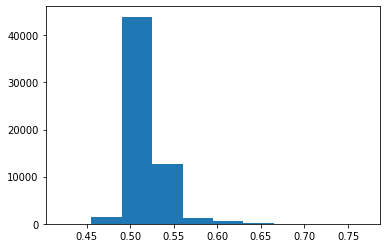

In [25]:
import matplotlib.pyplot as plt
plt.hist(prediction_proba)

In [26]:
out_data = pd.DataFrame(test_data.client_id)

In [27]:
prediction_proba.shape

(60012,)

In [28]:
test_data.shape

(60012, 18)

In [29]:
out_data['pred'] = prediction_proba

In [30]:
out_data.to_csv('results.csv', index=False)

In [31]:
out_data.head()

,client_id,pred
0,a9a604ed6e,0.522044
1,ebd7360016,0.518889
2,908cd9b8e8,0.520747
3,dceb8ce861,0.515077
4,f4f0ac6b06,0.514940
